# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

Text(0, 0.5, 'Time (s)')

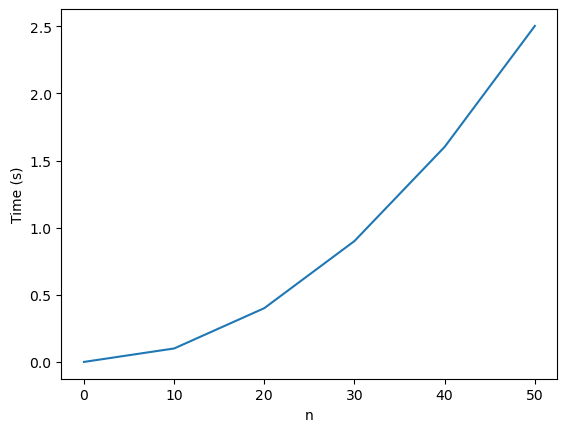

In [4]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

In [5]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

# timing function
def time_function(func):
    def wrapper(*args):
        start = time.time()
        func(*args)
        end = time.time()
        return end-start
    
    return wrapper

Text(0, 0.5, 'Time(s)')

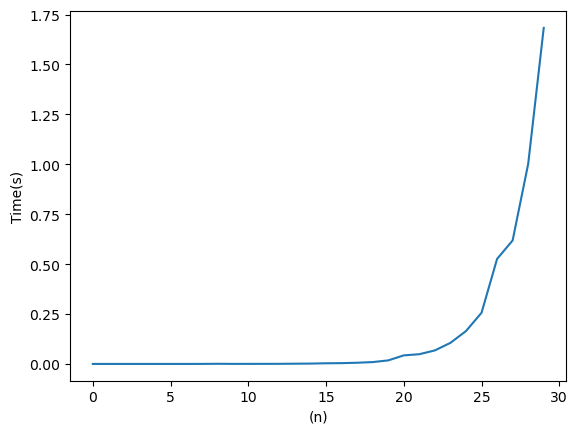

In [29]:
# recursive fibonacci

@time_function
def fibo(n):
    if n <= 2:
        return 1
    else:
        return fibo(n-1) + fibo(n-2)

fibo(6)

N = [n for n in range(30)]
T = [fibo(n) for n in N]

plt.plot(N, T)
plt.xlabel('(n)')
plt.ylabel('Time(s)') 



Text(0, 0.5, 'Time(s)')

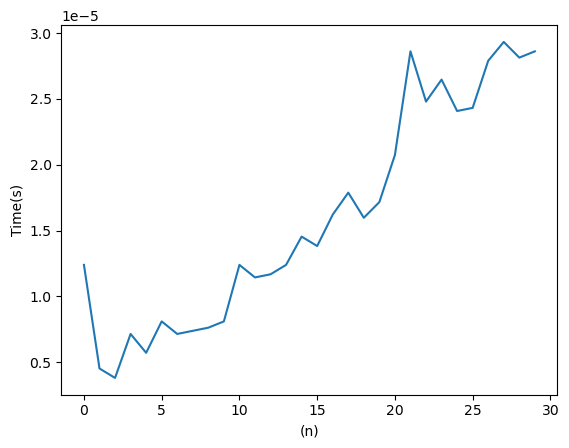

In [74]:
# dynamic programming soln

# O(n) time and O(n) memory

@time_function
def dynamic_fibo(n):
    dp = {0:1, 1:1, 2:1}
    for i in range(3, n+1):
        dp[i] = dp[i-1] + dp[i-2]

    return dp[n]
    
# plot
N = [n for n in range(30)]
T = []

for n in N:
    T.append(dynamic_fibo(n))
    dp = {0:0, 1:1, 2:1}

plt.plot(N, T)
plt.xlabel('(n)')
plt.ylabel('Time(s)') 



Text(0, 0.5, 'Time(s)')

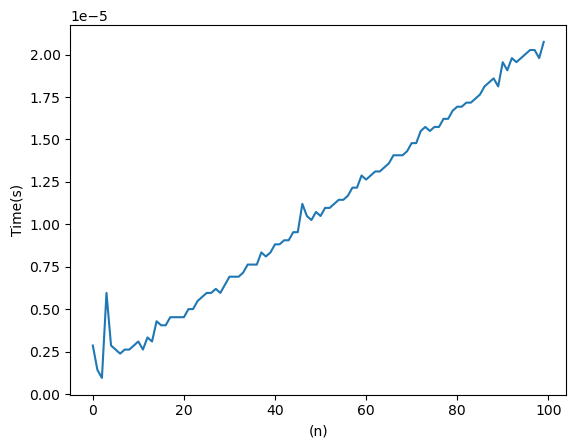

In [24]:
# reducing space complexity

@time_function
def fibo3(n):
    a, b = 1, 1

    if n >= 3:
        for i in range(3, n+1):
            a, b = b, a+b

    return b

# plot
N = [n for n in range(100)]
T = []

for n in N:
    T.append(fibo3(n))

plt.plot(N, T)
plt.xlabel('(n)')
plt.ylabel('Time(s)') 

Text(0, 0.5, 'Time(s)')

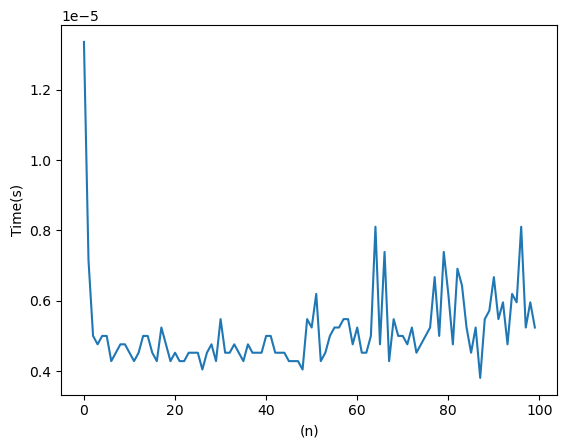

In [26]:
import math

# analytic form

"""
Using a formula and the golden ratio, we can maybe solve this in O(1) time? 
No. The formula involves floating point arithmetic, which requires higher precision to represent as n increases.
"""
@time_function
def fibo4(n):
    phi = 0.5 + math.sqrt(5) / 2

    return (phi**n - (1-phi)**n) / math.sqrt(5)

#plot

fibo4(4)

N = [n for n in range(100)]

T = []

for n in N:
    T.append(fibo4(n))

plt.plot(N, T)
plt.xlabel('(n)')
plt.ylabel('Time(s)') 



Text(0, 0.5, 'Time(s)')

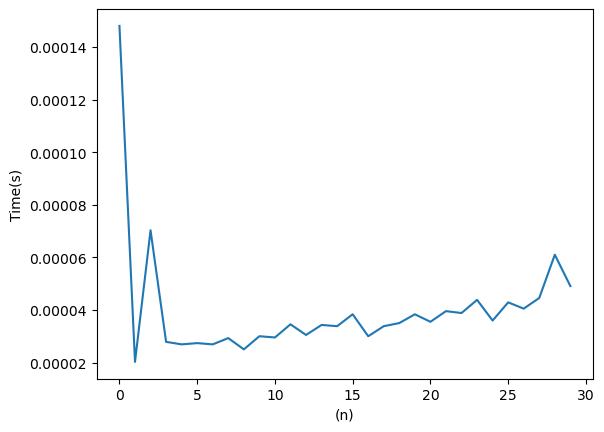

In [113]:
#matrix solution
m = np.array([[1, 1], [1, 0]])

@time_function
def fibo5_1(n):
    return np.linalg.matrix_power(m, n)[0][1]
            

# plot

N = [n for n in range(30)]
T = []

for n in N:
    T.append(fibo5_1(n))

plt.plot(N, T)
plt.xlabel('(n)')
plt.ylabel('Time(s)') 


In [27]:
# quiz stuff
def fibo3(n):
    a, b = 1, 1

    if n >= 3:
        for i in range(3, n+1):
            a, b = b, a+b

    return b

def fibo4(n):
    phi = 0.5 + math.sqrt(5) / 2

    return (phi**n - (1-phi)**n) / math.sqrt(5)

print([fibo3(n) for n in range(1, 40)])
print([fibo4(n) for n in range(1, 40)])

n = 1
three, four = fibo3(1), fibo4(1)

while(round(three) == round(four)):
    n += 1
    three = fibo3(n)
    four = fibo4(n)

print(n)

print(math.log(27, 2))

print(bin(27))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986]
[1.0, 1.0, 2.0, 3.0000000000000004, 5.000000000000001, 8.000000000000002, 13.000000000000002, 21.000000000000004, 34.00000000000001, 55.000000000000014, 89.00000000000003, 144.00000000000006, 233.00000000000006, 377.00000000000017, 610.0000000000003, 987.0000000000005, 1597.000000000001, 2584.000000000002, 4181.000000000003, 6765.000000000005, 10946.000000000007, 17711.00000000001, 28657.000000000022, 46368.00000000004, 75025.00000000006, 121393.00000000009, 196418.00000000017, 317811.0000000003, 514229.00000000047, 832040.0000000008, 1346269.0000000012, 2178309.0000000023, 3524578.0000000037, 5702887.0000000065, 9227465.000000011, 14930352.000000019, 24157817.000000026, 39088169.000000045, 63245986.00000007]
71
4.754887502163469
0b11011
